In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")
flavors = whisky.iloc[:, 2:14]
corr_whisky = pd.DataFrame.corr(flavors.transpose())

from sklearn.cluster.bicluster import SpectralCoclustering
model = SpectralCoclustering(n_clusters=6, random_state=0)
model.fit(corr_whisky)
np.sum(model.rows_, axis = 1)

array([ 5, 20, 19,  6, 19, 17])

In [8]:
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
whisky

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region,Group
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands,2
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside,4
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands,5
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay,3
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands,5
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands,4
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside,1
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside,4


In [6]:
whisky = whisky.reset_index(drop=True)

In [9]:
correlations = pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())

In [10]:
correlations = np.array(correlations)

In [15]:
whisky['Group'] = pd.Series(model.row_labels_, index=whisky.index)
whisky = whisky.iloc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)

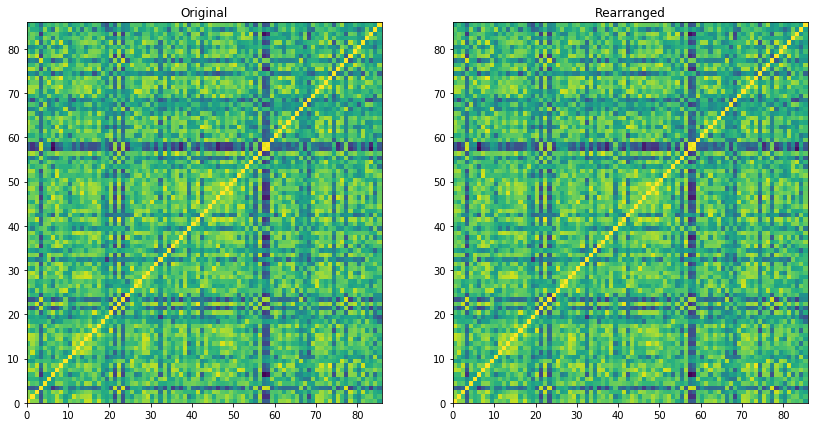

In [17]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.savefig("correlations.pdf")

In [31]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.iloc[[3,0,1,2]]
# 1: data.ix alters the order of appearance, but leaves the indices the same. correct

In [32]:
import pandas as pd
data = pd.Series([1,2,3,4])
data = data.loc[[3,0,1,2]]
data = data.reset_index(drop=True)
# 4: The 0th index of the data has been reordered to index 3 of the original, which is 4.